> **提示**：欢迎参加“调查数据集”项目！引用段会添加这种提示，帮助你制定调查方法。提交项目之前，最后浏览一下报告，将这一段删除，以保持报告简洁。首先，需要双击这个 Markdown 框，将标题更改为与数据集和调查相关的标题。

# 项目：调查数据集（用更具体的标题代替这个标题！）

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：在这一段报告中对你选择进行分析的数据集进行简要介绍。在本段末尾，对你计划在报告过程中探索的问题进行描述。自己尝试建立至少一个因变量和三个自变量的分析报告。如果你不确定要问什么问题，务必熟悉数据集、数据集变量以及数据集上下文，以便确定要探索的问题。

> 如果尚未选择和下载数据，务必先进行这一步，再回到这里。如需在这个工作区中处理数据，还需要将其上传到工作区。因此，请单击左上角的 jupyter 图标，回到工作区目录。右上角有一个‘上传’按钮，可以将你的数据文件添加到工作区。然后单击 .ipynb 文件名，回到这里。

In [1]:
# 用这个框对你计划使用的所有数据包设置
#   导入语句。
import pandas as pd
import matplotlib.pyplot as plt

# 务必包含一个‘咒语’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问这个网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## 数据整理

> **提示**：在这一段报告中载入数据，检查简洁度，然后整理和清理数据集，以进行分析。务必将步骤仔细归档，并确定清理决策是否正确。

- 删除重复数据
- 转换时间类型
- 补全缺失数据（有必要的话）

### 常规属性

In [2]:
# 加载数据并打印几行。进行几项操作，检查数据
#   类型，以及是否有缺失数据或错误数据。
movies = pd.read_csv('data/tmdb-movies.csv')
movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
# 查看电影的keywords信息
movies['keywords'][2]

'based on novel|revolution|dystopia|sequel|dystopic future'

In [4]:
# 查看缺失数据的列
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
movies[movies.duplicated(subset=['original_title'])]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1133,281778,tt3297792,0.188264,0,0,Survivor,Danielle Chuchran|Kevin Sorbo|Rocky Myers|Ruby...,http://www.arrowstormentertainment.com/#!survi...,John Lyde,Alone. Stranded. Deadly,...,During their search for a habitable planet the...,93,Science Fiction|Action|Fantasy,Arrowstorm Entertainment,7/22/14,23,4.9,2014,0.000000e+00,0.000000e+00
1194,296626,tt3534842,0.132764,0,0,Finders Keepers,Jaime Pressly|Kylie Rogers|Tobin Bell|Patrick ...,NaN,Alexander Yellen,NaN,...,A haunted doll teaches one little girl why chi...,85,Mystery|Thriller|Horror,HFD Productions|Hybrid LLC,10/18/14,33,4.8,2014,0.000000e+00,0.000000e+00
1349,42222,tt0076245,0.398651,0,0,Julia,Jane Fonda|Vanessa Redgrave|Jason Robards|Maxi...,NaN,Fred Zinnemann,"Through It All, Friendship Prevailed.",...,JULIA covers the 1930s when Lillian attained f...,117,Drama,Twentieth Century Fox Film Corporation,10/2/77,10,5.0,1977,0.000000e+00,0.000000e+00
1440,7445,tt0765010,1.223786,26000000,43318349,Brothers,Tobey Maguire|Jake Gyllenhaal|Natalie Portman|...,NaN,Jim Sheridan,There are two sides to every family.,...,When his helicopter goes down during his fourt...,104,Drama|Thriller|War,Lionsgate|Relativity Media|Sighvatsson Films|M...,1/27/09,381,6.7,2009,2.642641e+07,4.402879e+07
1513,62320,tt1014762,0.688361,0,0,Home,Glenn Close|Yann Arthus-Bertrand|Jacques Gambl...,http://www.homethemovie.org/,Yann Arthus-Bertrand,A Stunning Visual Portrayal of Earth,...,"With aerial footage from 54 countries, Home is...",95,Documentary,Europa Corp.|ElzÃ©vir Films|France 2 (FR2),6/3/09,109,7.8,2009,0.000000e+00,0.000000e+00
1707,79896,tt1336006,0.310600,0,0,The Revenant,Chris Wylde|David Anders|Louise Griffiths|Jacy...,http://www.therevenantmovie.com/,D. Kerry Prior,What could be worse than having your best frie...,...,A horror movie/buddy comedy about Joey and his...,110,Comedy|Horror,Putrefactory Limited|Wanko Toys,8/16/09,30,5.5,2009,0.000000e+00,0.000000e+00
1753,36465,tt0992993,0.250389,0,0,Into the Storm,Brendan Gleeson|Iain Glen|James D'Arcy|Janet M...,http://www.hbo.com/movies/into-the-storm/index...,Thaddeus O'Sullivan,NaN,...,Continuing the storyline of The Gathering Stor...,100,Drama|History|Foreign,NaN,5/31/09,13,5.8,2009,0.000000e+00,0.000000e+00
1757,21398,tt1220213,0.321244,5000000,0,Grace,Jordan Ladd|Samantha Ferris|Gabrielle Rose|Ste...,NaN,Paul Solet,Love. Undying.,...,In the wake of a horrific car accident that ki...,94,Horror|Thriller,ArieScope Pictures|Dark Eye Entertainment|Leom...,8/14/09,21,4.9,2009,5.082002e+06,0.000000e+00
1865,220903,tt1533395,0.102223,0,0,Life,David Attenborough|Oprah Winfrey,http://www.bbc.co.uk/programmes/b00lbpcy,Martha Holmes|Simon Blakeney|Stephen Lyle,From the Makers of Planet Earth,...,David Attenborough's legendary BBC crew explai...,500,Documentary,British Broadcasting Corporation (BBC),12/14/09,24,7.0,2009,0.000000e+00,0.000000e+00
2036,41505,tt1179069,0.794885,22000000,851517,Shelter,Julianne Moore|Jonathan Rhys Meyers|Jeffrey De...,http://www.shelter-movie.jp/index.html,BjÃ¶rn Stein|MÃ¥ns MÃ¥rlind,Evil will rise.,...,A female forensic psychiatrist discovers that ...,112,Horror|Mystery|Thriller,NALA Films|IM Global|Maraci/Edelstein Films|Sh...,3/27/10,112,5.5,2010,2.200000e+07,8.515170e+05


In [6]:
movies[movies['original_title'] == 'Julia']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1156,278632,tt2582426,0.240776,0,2710,Julia,Ashley C. Williams|Tahyna Tozzi|Jack Noseworth...,http://tombstonedistribution.com/julia/,Matthew A. Brown,NaN,...,"After suffering a brutal trauma, Julia uses an...",95,Thriller|Horror,Zero Gravity Management|Farraj Factory|Kinetic...,10/14/14,17,4.8,2014,0.000000e+00,2.496157e+03
1349,42222,tt0076245,0.398651,0,0,Julia,Jane Fonda|Vanessa Redgrave|Jason Robards|Maxi...,NaN,Fred Zinnemann,"Through It All, Friendship Prevailed.",...,JULIA covers the 1930s when Lillian attained f...,117,Drama,Twentieth Century Fox Film Corporation,10/2/77,10,5.0,1977,0.000000e+00,0.000000e+00
3272,7351,tt0903627,0.281186,6000000,1300000,Julia,Tilda Swinton|Kate del Castillo|Aidan Gould|Br...,NaN,Erick Zonca,NaN,...,An alcoholic (Tilda Swinton) becomes involved ...,138,Drama,Le Bureau|Jaibol Films,2/9/08,10,7.1,2008,6.076720e+06,1.316623e+06


In [7]:
# 删除重复数据
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
movies.drop_duplicates(inplace=True)

In [9]:
sum(movies.duplicated())

0

In [19]:
# 将时间转换为datetime类型
pd.to_datetime(movies['release_date'], format='%m/%d/%y').tail()

10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, dtype: datetime64[ns]

In [12]:
movies['release_date'].tail(5)

10861     6/15/66
10862    12/21/66
10863      1/1/66
10864     11/2/66
10865    11/15/66
Name: release_date, dtype: object

In [13]:
movies.tail(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [18]:
movies.loc[:, ['release_date','release_year']][2250:2300].head()

,release_date,release_year
2251,5/12/10,2010
2252,3/14/10,2010
2253,10/1/10,2010
2254,8/27/10,2010
2255,5/7/10,2010


In [17]:
pd.to_datetime(movies['release_year'],format='%Y').head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: release_year, dtype: datetime64[ns]

> **提示**：_不应_在每个框中进行太多操作。可以自由创建框，进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索操作。不要求对其进行组织，但务必仔细阅读备注，理解每个代码框的用途。完成分析之后，可以创建 notebook 副本，在其中去除多余数据，组织步骤，从而形成结构连贯、紧密的报告。

> **提示**：务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。尽量做到这一点，以便读者理解后续框中的内容。

### 数据清理（用更具体的标题代替这个标题！）

In [ ]:
# 讨论数据结构和需要解决的任何问题之后，
#   在本段的第二部分进行这些清理步骤。


<a id='eda'></a>
## 探索性数据分析

> **提示**：整理和清理数据之后，现在可以进行探索。计算统计值，创建视图，解决你在简介段提出的研究问题。建议采用系统化方法。一次探索一个变量，然后探索变量之间的关系。

### 研究问题 1（替换这个标题名称！）

In [ ]:
# 用这个代码框和其它代码框探索数据。务必添加
#   Markdown 框，以便归档你的观察和调查结果。


### 研究问题 2（替换这个标题名称！）

In [ ]:
# 继续探索数据，解决你的附加研究问题。
#   如果有其它问题要调查，
#   请根据需要添加更多标题。


### 研究问题 1: 每年最受欢迎的电影类别有哪些

In [23]:
movies['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

### 研究问题 2: 世界电影评分趋势

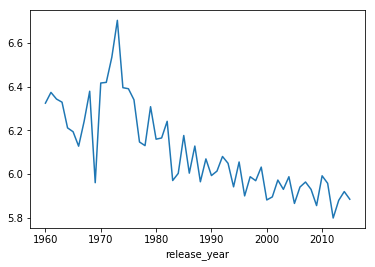

In [28]:
movies.groupby('release_year')['vote_average'].mean().plot();

<a id='conclusions'></a>
## 结论

> **提示**：最后，总结你的调查结果。确保了解探索结果的限制。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相互关系推导出因果关系！

> **提示**：如果对报告满意，应将其副本保存为 HTML 或 PDF 形式。导出报告之前请检查一遍，确保报告流程完整。应删除所有类似的“提示”引用段，以保持报告简洁。还需要查看课程结尾的项目提交页的项目审阅规范。

> 如需将报告导出到工作区，应运行下面的代码框。如果正确，会返回代码 0，工作区目录下会生成 .html 文件（单击左上角的 jupyter 图标）。也可以通过 **文件** > **下载为** 子菜单下载 html 报告，然后手动上传到工作区目录。完成之后，可以单击右下角的“提交项目”，提交你的项目。恭喜！

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])